In [75]:
import pandas as pd
import numpy as np

**WRANGLING**

In [76]:
# Read the data
df=pd.read_csv('Fraud.csv')
# Shape the data
df.shape

(179014, 11)

In [78]:
# Get head of the data
df.head(200)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.00,0.00,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.00,0.00,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.00,0.00,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.00,0.00,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.00,0.00,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
195,1,CASH_OUT,210370.09,C2121995675,0.0,0.00,C1170794006,1442298.03,22190.99,0.0,0.0
196,1,CASH_OUT,36437.06,C2120063568,0.0,0.00,C1740000325,154606.00,1363368.51,0.0,0.0
197,1,CASH_OUT,82691.56,C1620409359,0.0,0.00,C248609774,657983.89,6453430.91,0.0,0.0
198,1,CASH_OUT,338767.10,C691691381,0.0,0.00,C453211571,544481.28,3461666.05,0.0,0.0


In [79]:
df.tail(200)

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
178814,12,CASH_OUT,457561.01,C875976244,0.00,0.00,C290945720,8970784.20,8920549.12,0.0,0.0
178815,12,CASH_OUT,298288.65,C1030412209,0.00,0.00,C634490530,473068.02,378997.50,0.0,0.0
178816,12,CASH_OUT,507050.74,C1938598417,0.00,0.00,C520742159,2535833.41,3279009.64,0.0,0.0
178817,12,CASH_OUT,317076.66,C1065250391,0.00,0.00,C536693278,1708007.58,2852073.92,0.0,0.0
178818,12,CASH_OUT,576216.38,C973019258,0.00,0.00,C1269605689,1329696.85,2142476.06,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
179009,12,CASH_IN,200271.90,C1829080213,3896164.44,4096436.33,C1769155229,531167.90,690790.44,0.0,0.0
179010,12,CASH_IN,266616.13,C1119089903,4096436.33,4363052.46,C859300166,6064698.49,6080565.41,0.0,0.0
179011,12,CASH_IN,194735.24,C595356999,4363052.46,4557787.70,C803648645,288407.25,152597.27,0.0,0.0
179012,12,CASH_IN,61212.03,C1705359203,4557787.70,4618999.73,C60296041,2492638.18,2620615.37,0.0,0.0


In [80]:
# Check for null values
df.isnull().values.any()

True

In [81]:
# Getting information about data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179014 entries, 0 to 179013
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            179014 non-null  int64  
 1   type            179014 non-null  object 
 2   amount          179014 non-null  float64
 3   nameOrig        179013 non-null  object 
 4   oldbalanceOrg   179013 non-null  float64
 5   newbalanceOrig  179013 non-null  float64
 6   nameDest        179013 non-null  object 
 7   oldbalanceDest  179013 non-null  float64
 8   newbalanceDest  179013 non-null  float64
 9   isFraud         179013 non-null  float64
 10  isFlaggedFraud  179013 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 15.0+ MB


In [82]:
legit = len(df[df.isFraud == 0])
fraud = len(df[df.isFraud == 1])
legit_percent = (legit / (fraud + legit)) * 100
fraud_percent = (fraud / (fraud + legit)) * 100

print("Number of Legit transactions: ", legit)
print("Number of Fraud transactions: ", fraud)
print("Percentage of Legit transactions: {:.4f} %".format(legit_percent))
print("Percentage of Fraud transactions: {:.4f} %".format(fraud_percent))

Number of Legit transactions:  178874
Number of Fraud transactions:  139
Percentage of Legit transactions: 99.9224 %
Percentage of Fraud transactions: 0.0776 %


In [83]:
# Merchants
X = df[df['nameDest'].str.contains('M') & pd.notna(df['nameDest'])]
X.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0
5,1,PAYMENT,7817.71,C90045638,53860.0,46042.29,M573487274,0.0,0.0,0.0,0.0
6,1,PAYMENT,7107.77,C154988899,183195.0,176087.23,M408069119,0.0,0.0,0.0,0.0


**VISUALISATION**

In [84]:
import seaborn as sns
import matplotlib.pyplot as plt

CORRELATION HEATMAP

<ipython-input-85-b43972a5c17a>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr=df.corr()


<Axes: >

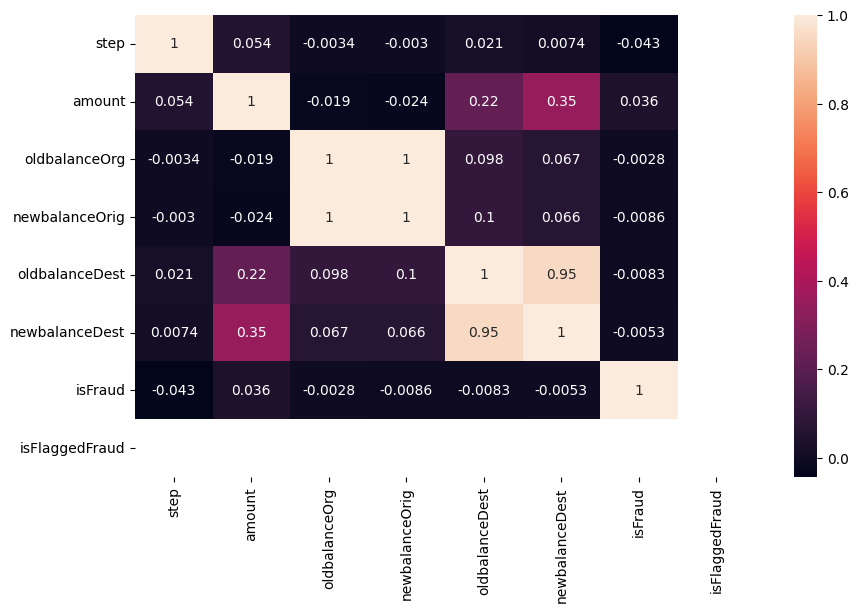

In [85]:
corr=df.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True)

NUMBER OF LEGIT AND FRAUD TRANSACTIONS

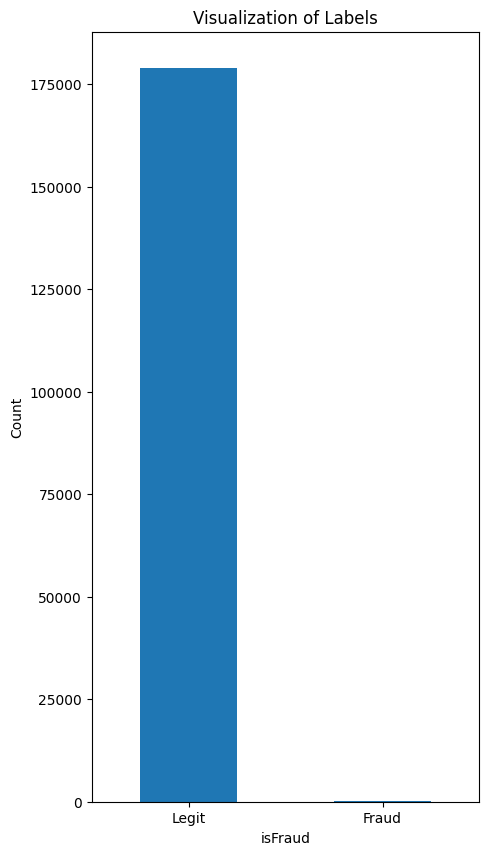

In [86]:
plt.figure(figsize=(5,10))
labels = ["Legit", "Fraud"]
count_classes = df.value_counts(df['isFraud'], sort= True)
count_classes.plot(kind = "bar", rot = 0)
plt.title("Visualization of Labels")
plt.ylabel("Count")
plt.xticks(range(2), labels)
plt.show()

**PROBLEM SOLVING**

In [87]:
#creating a copy of original dataset to train and test models

new_df=df.copy()
new_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0


LABEL ENCODING

In [88]:
# Checking how many attributes are dtype: object

objList = new_df.select_dtypes(include = "object").columns
print (objList)

Index(['type', 'nameOrig', 'nameDest'], dtype='object')


In [89]:
#Label Encoding for object to numeric conversion
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for feat in objList:
    new_df[feat] = le.fit_transform(new_df[feat].astype(str))

print (new_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179014 entries, 0 to 179013
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   step            179014 non-null  int64  
 1   type            179014 non-null  int64  
 2   amount          179014 non-null  float64
 3   nameOrig        179014 non-null  int64  
 4   oldbalanceOrg   179013 non-null  float64
 5   newbalanceOrig  179013 non-null  float64
 6   nameDest        179014 non-null  int64  
 7   oldbalanceDest  179013 non-null  float64
 8   newbalanceDest  179013 non-null  float64
 9   isFraud         179013 non-null  float64
 10  isFlaggedFraud  179013 non-null  float64
dtypes: float64(7), int64(4)
memory usage: 15.0 MB
None


In [90]:
new_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,21261,170136.0,160296.36,53488,0.0,0.0,0.0,0.0
1,1,3,1864.28,61367,21249.0,19384.72,55706,0.0,0.0,0.0,0.0
2,1,4,181.00,28050,181.0,0.00,15151,0.0,0.0,1.0,0.0
3,1,1,181.00,164172,181.0,0.00,13461,21182.0,0.0,1.0,0.0
4,1,3,11668.14,96509,41554.0,29885.86,27529,0.0,0.0,0.0,0.0


MULTICOLINEARITY

In [91]:
new_df.replace([np.inf, -np.inf], np.nan, inplace=True)
new_df.dropna(inplace=True)

def calc_vif(df):
    variables = df.values
    vif = pd.DataFrame()
    vif["Variable"] = df.columns
    vif["VIF"] = [variance_inflation_factor(variables, i) for i in range(variables.shape[1])]
    return vif

calc_vif(new_df)

/usr/local/lib/python3.10/dist-packages/statsmodels/regression/linear_model.py:1783: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


,Variable,VIF
0,step,5.763014
1,type,6.009382
2,amount,2.048393
3,nameOrig,3.645649
4,oldbalanceOrg,625.263653
5,newbalanceOrig,633.266636
6,nameDest,4.396258
7,oldbalanceDest,13.985440
8,newbalanceDest,15.578430
9,isFraud,1.019296


<Axes: >

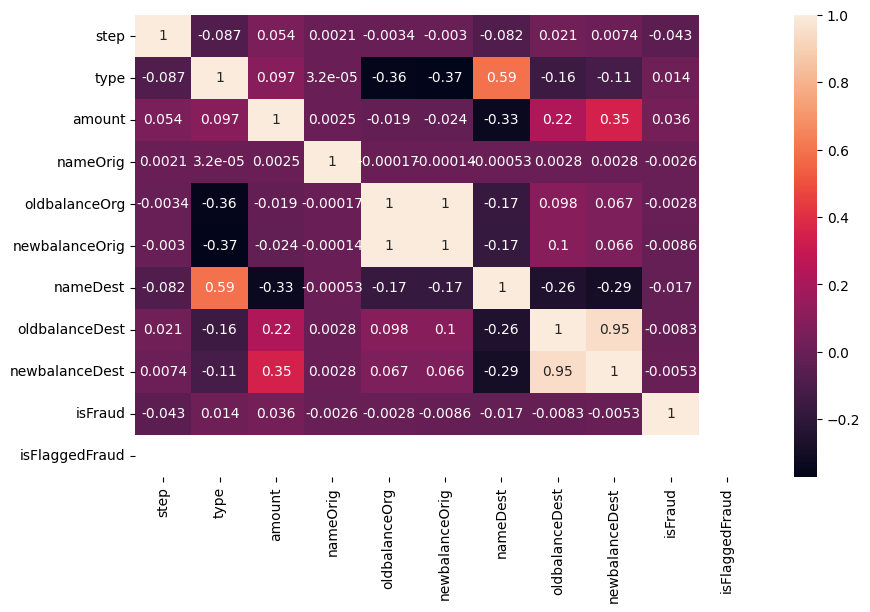

In [92]:
corr=new_df.corr()

plt.figure(figsize=(10,6))
sns.heatmap(corr,annot=True)

**MODEL BUILDING**

In [93]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
import itertools
from collections import Counter
import sklearn.metrics as metrics
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

NORMALIZING (SCALING) AMOUNT

In [94]:
# Perform Scaling
scaler = StandardScaler()
new_df["NormalizedAmount"] = scaler.fit_transform(new_df["amount"].values.reshape(-1, 1))
new_df.drop(["amount"], inplace= True, axis= 1)

Y = new_df["isFraud"]
X = new_df.drop(["isFraud"], axis= 1)

TRAIN-TEST SPLIT

In [95]:
# Split the data
(X_train, X_test, Y_train, Y_test) = train_test_split(X, Y, test_size= 0.3, random_state= 42)

print("Shape of X_train: ", X_train.shape)
print("Shape of X_test: ", X_test.shape)

Shape of X_train:  (125309, 10)
Shape of X_test:  (53704, 10)


MODEL TRAINING

In [96]:
# DECISION TREE

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

Y_pred_dt = decision_tree.predict(X_test)
decision_tree_score = decision_tree.score(X_test, Y_test) * 100

In [97]:
# RANDOM FOREST

random_forest = RandomForestClassifier(n_estimators= 100)
random_forest.fit(X_train, Y_train)

Y_pred_rf = random_forest.predict(X_test)
random_forest_score = random_forest.score(X_test, Y_test) * 100

**EVALUATION**

In [98]:



# Print scores of our classifiers

print("Decision Tree Score: ", decision_tree_score)
print("Random Forest Score: ", random_forest_score)

Decision Tree Score:  99.91248324147178
Random Forest Score:  99.96089676746611


In [99]:
# key terms of Confusion Matrix - DT

print("TP,FP,TN,FN - Decision Tree")
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred_dt).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

print("----------------------------------------------------------------------------------------")

# key terms of Confusion Matrix - RF

print("TP,FP,TN,FN - Random Forest")
tn, fp, fn, tp = confusion_matrix(Y_test, Y_pred_rf).ravel()
print(f'True Positives: {tp}')
print(f'False Positives: {fp}')
print(f'True Negatives: {tn}')
print(f'False Negatives: {fn}')

TP,FP,TN,FN - Decision Tree
True Positives: 12
False Positives: 28
True Negatives: 53645
False Negatives: 19
----------------------------------------------------------------------------------------
TP,FP,TN,FN - Random Forest
True Positives: 11
False Positives: 1
True Negatives: 53672
False Negatives: 20


TP(Decision Tree) ~ TP(Random Forest) so no competetion here.         
FP(Decision Tree) >> FP(Random Forest) - Random Forest has an edge      
TN(Decision Tree) < TN(Random Forest) - Random Forest is better here too  
FN(Decision Tree) ~ FN(Random Forest)


Here Random Forest looks good.

In [100]:
# confusion matrix - DT

confusion_matrix_dt = confusion_matrix(Y_test, Y_pred_dt.round())
print("Confusion Matrix - Decision Tree")
print(confusion_matrix_dt,)

print("----------------------------------------------------------------------------------------")

# confusion matrix - RF

confusion_matrix_rf = confusion_matrix(Y_test, Y_pred_rf.round())
print("Confusion Matrix - Random Forest")
print(confusion_matrix_rf)

Confusion Matrix - Decision Tree
[[53645    28]
 [   19    12]]
----------------------------------------------------------------------------------------
Confusion Matrix - Random Forest
[[53672     1]
 [   20    11]]


In [101]:
# classification report - DT

classification_report_dt = classification_report(Y_test, Y_pred_dt)
print("Classification Report - Decision Tree")
print(classification_report_dt)

print("----------------------------------------------------------------------------------------")

# classification report - RF

classification_report_rf = classification_report(Y_test, Y_pred_rf)
print("Classification Report - Random Forest")
print(classification_report_rf)

Classification Report - Decision Tree
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     53673
         1.0       0.30      0.39      0.34        31

    accuracy                           1.00     53704
   macro avg       0.65      0.69      0.67     53704
weighted avg       1.00      1.00      1.00     53704

----------------------------------------------------------------------------------------
Classification Report - Random Forest
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     53673
         1.0       0.92      0.35      0.51        31

    accuracy                           1.00     53704
   macro avg       0.96      0.68      0.76     53704
weighted avg       1.00      1.00      1.00     53704



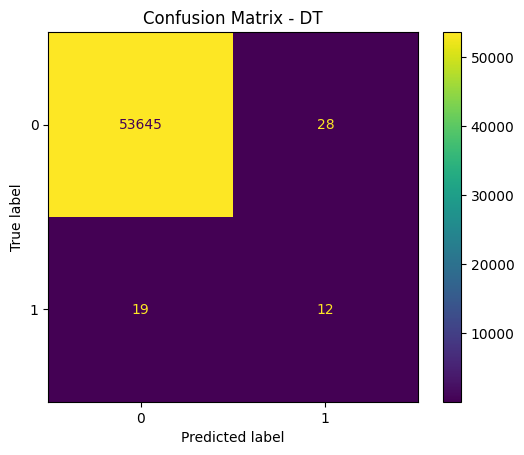

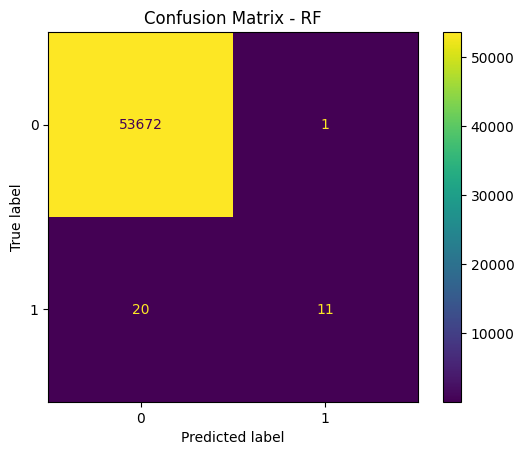

In [102]:
# visualising confusion matrix - DT


disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_dt)
disp.plot()
plt.title('Confusion Matrix - DT')
plt.show()

# visualising confusion matrix - RF
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix_rf)
disp.plot()
plt.title('Confusion Matrix - RF')
plt.show()

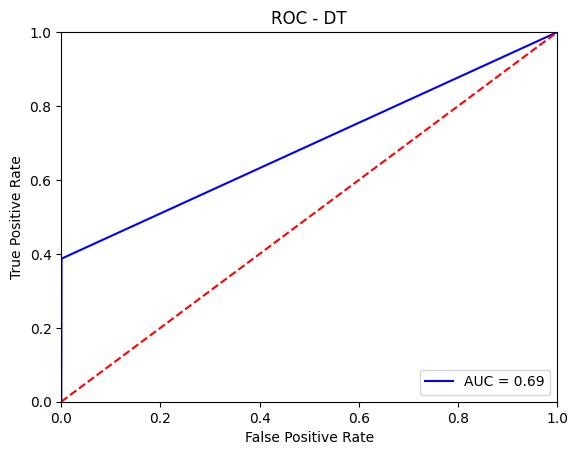

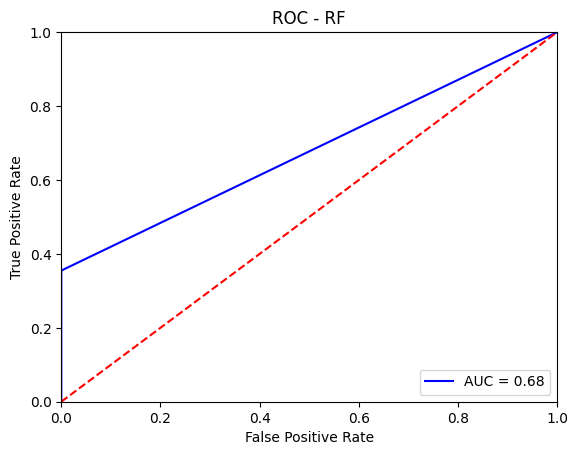

In [103]:
# AUC ROC - DT
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(Y_test, Y_pred_dt)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC - DT')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# AUC ROC - RF
# calculate the fpr and tpr for all thresholds of the classification

fpr, tpr, threshold = metrics.roc_curve(Y_test, Y_pred_rf)
roc_auc = metrics.auc(fpr, tpr)

plt.title('ROC - RF')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

THE AUC for both Decision Tree and Random Forest is equal, so both models are pretty good at what they do

**CONCLUSION**

We have seen that Accuracy of both Random Forest and Decision Tree is equal, although teh precision of Random Forest is more. In a fraud detection model, Precision is highly important because rather than predicting normal transactions correctly we want Fraud transactions to be predicted correctly and Legit to be left off.If either of the 2 reasons are not fulfiiled we may catch the innocent and leave the culprit.
This is also one of the reason why Random Forest and Decision Tree are used unstead of other algorithms.


Also the reason I have chosen this model is because of highly unbalanced dataset (Legit: Fraud :: 99.87:0.13). Random forest makes multiple decision trees which makes it easier (although time taking) for model to understand the data in a simpler way since Decision Tree makes decisions in a boolean way.


Models like XGBoost, Bagging, ANN, and Logistic Regression may give good accuracy but they won't give good precision and recall values.


What are the key factors that predict fraudulent customer?

1. The source of request is secured or not ?
2. Is the name of organisation asking for money is legit or not ?
3. Transaction history of vendors.

What kind of prevention should be adopted while company update its infrastructure?

- Use smart vertified apps only.          
- Browse through secured websites.  
- Use secured internet connections (USE VPN).   
- Keep your mobile and laptop security updated.   
- Don't respond to unsolicited calls/SMS(s/E-mails.     
- If you feel like you have been tricked or security compromised, contact your bank immidiately.


Assuming these actions have been implemented, how would you determine if they work?

- Bank sending E-statements.    
- Customers keeping a check of their account activity.  
- Always keep a log of your payments.